In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
from pva import plot_precision_curve

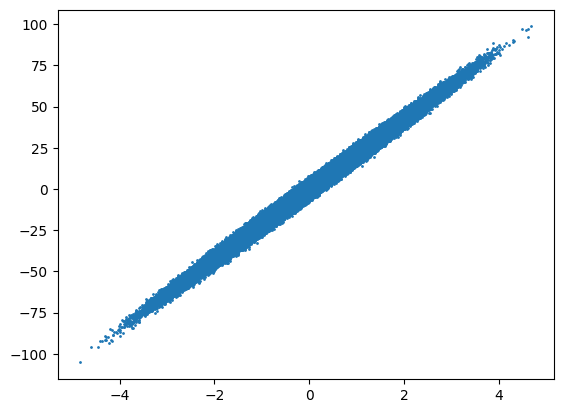

In [3]:
X, y = make_regression(n_samples=1_000_000, n_features=1, noise=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

plt.scatter(X_train, y_train, s=1)

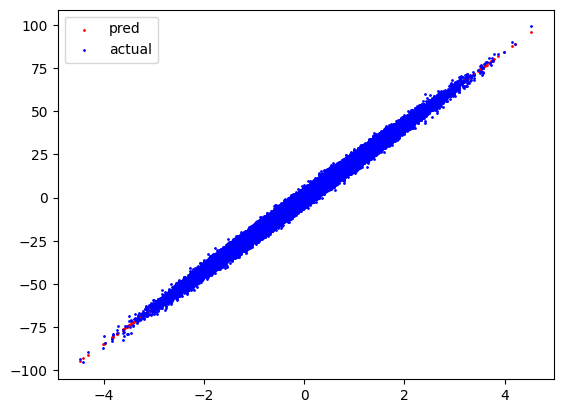

In [4]:
ridge = Ridge(alpha=0.5)

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

plt.scatter(X_test, y_pred, s=1, c='r', label='pred')
plt.scatter(X_test, y_test, s=1, c='b', label='actual')

plt.legend()

In [5]:
import time

sz:     10, time: 602.999600 (ms)	std: 21.216080 (ms)
sz:    100, time: 2507.000100 (ms)	std: 13.631504 (ms)
sz:    500, time: 9655.522600 (ms)	std: 94.838152 (ms)
sz:   1000, time: 17717.615500 (ms)	std: 99.143314 (ms)
sz:   5000, time: 71143.721900 (ms)	std: 131.112674 (ms)
sz:  10000, time: 132587.000100 (ms)	std: 154.430442 (ms)
sz:  25000, time: 322790.513200 (ms)	std: 605.836356 (ms)


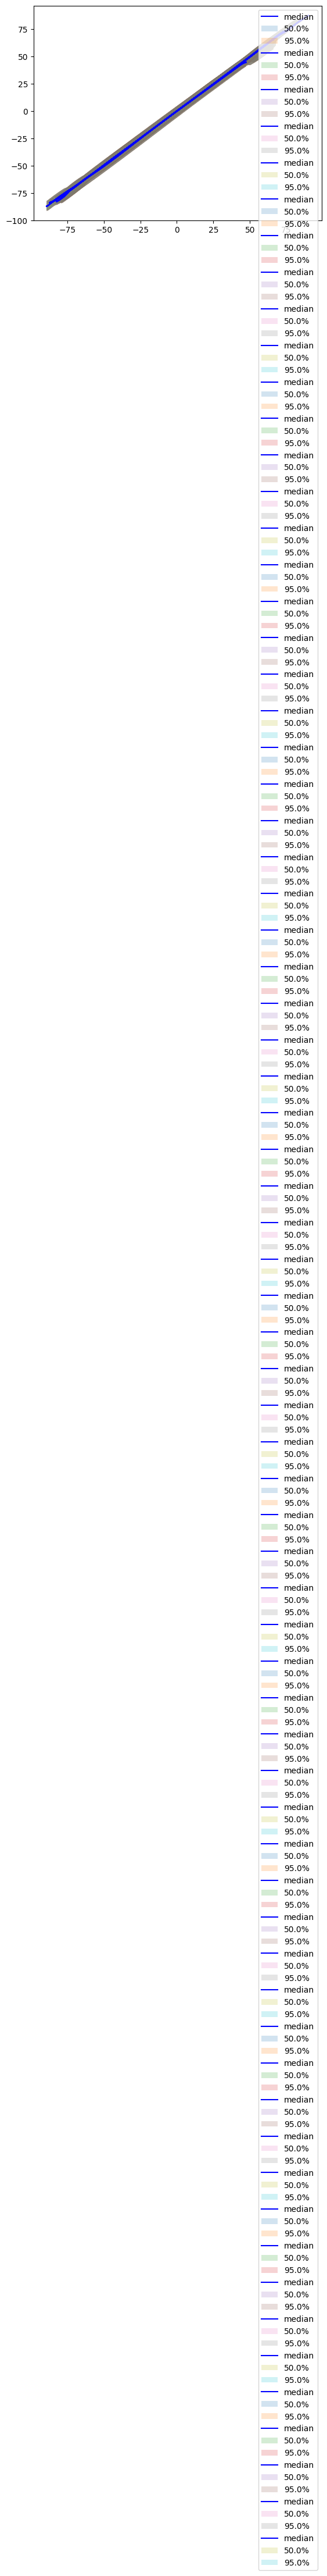

In [10]:
_, ax = plt.subplots()

min_tm = []
std_tm = []

for i, sz in enumerate([10, 100, 500, 1000, 5000, 10000, 25000]):    
    tm = []
    for _ in range(10):
        begin = time.time_ns()
        plot_precision_curve(y_true=y_test[0:sz], y_pred=y_pred[0:sz], ax=ax)
        end = time.time_ns()
        tm.append(end - begin)
    
    min_tm.append(min(tm))
    std_tm.append(np.std(tm))
    
    print(f"sz: {sz:6}, time: {min_tm[-1] * 1e-6:.6f} (ms)\tstd: {std_tm[-1] * 1e-6:.6f} (ms)")

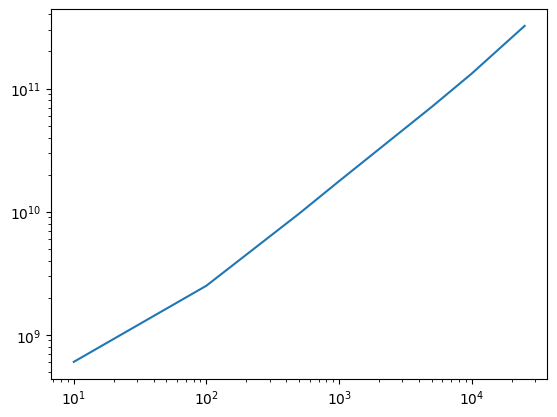

In [12]:
plt.plot([10, 100, 500, 1000, 5000, 10000, 25000], min_tm)

plt.xscale('log')
plt.yscale('log')